In [ ]:
pip install mediapipe-model-maker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import files
import os
import tensorflow as tf
assert tf.__version__.startswith('2')

from mediapipe_model_maker import gesture_recognizer

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import kagglehub

dataset_path = kagglehub.dataset_download("innominate817/hagrid-sample-30k-384p")

print("Path to dataset files:", dataset_path)

100%|██████████| 823M/823M [00:43<00:00, 19.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5


In [ ]:
!rm -r  /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet

rm: cannot remove '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet': No such file or directory


In [ ]:
source_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k"
target_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet"

os.makedirs(target_dir, exist_ok=True)

In [ ]:
import shutil

In [ ]:
folders = [folder for folder in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, folder))]
print(folders)


['train_val_mute', 'train_val_palm', 'train_val_stop_inverted', 'train_val_peace', 'train_val_dislike', 'train_val_like', 'train_val_peace_inverted', 'train_val_three', 'train_val_call', 'train_val_rock', 'train_val_four', 'train_val_three2', 'train_val_two_up_inverted', 'train_val_stop', 'train_val_one', 'train_val_ok', 'train_val_fist', 'train_val_two_up']


In [ ]:
folders_to_copy = folders[:5]

for folder_name in folders_to_copy:
    source_folder = os.path.join(source_dir, folder_name)
    target_folder = os.path.join(target_dir, folder_name)
    os.makedirs(target_folder, exist_ok=True)

    files = os.listdir(source_folder)

    files_to_copy = files[:125]

    for file_name in files_to_copy:
        source_file = os.path.join(source_folder, file_name)
        target_file = os.path.join(target_folder, file_name)
        shutil.copy2(source_file, target_file)

    print(f"Copiati {len(files_to_copy)} file dalla cartella '{folder_name}' a '{target_folder}'")

print("Operazione completata.")

Copiati 125 file dalla cartella 'train_val_mute' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_mute'
Copiati 125 file dalla cartella 'train_val_palm' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_palm'
Copiati 125 file dalla cartella 'train_val_stop_inverted' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_stop_inverted'
Copiati 125 file dalla cartella 'train_val_peace' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_peace'
Copiati 125 file dalla cartella 'train_val_dislike' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/train_val_dislike'
Operazione completata.


In [ ]:
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet/None

In [ ]:
dataset_path = target_dir
print(target_dir)
labels = []
for i in os.listdir(dataset_path):
  if os.path.isdir(os.path.join(dataset_path, i)):
    labels.append(i)
print(labels)

/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/reductionDataSet
['train_val_mute', 'train_val_palm', 'train_val_stop_inverted', 'train_val_peace', 'train_val_dislike', 'None']


In [ ]:
%matplotlib inline

IndexError: list index out of range

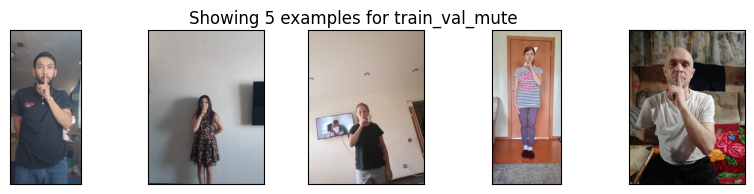

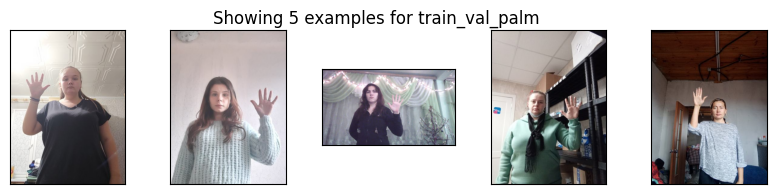

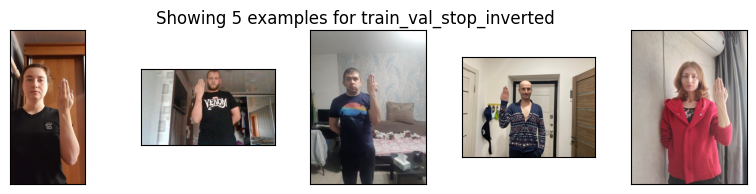

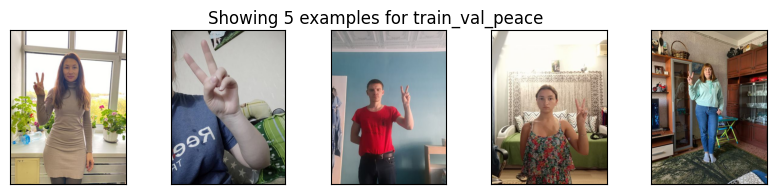

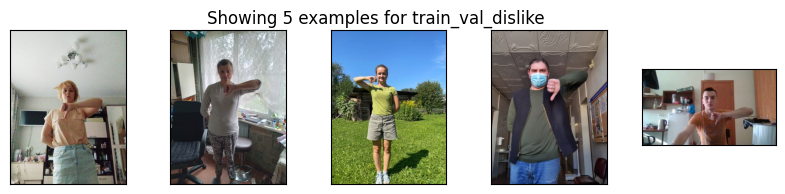

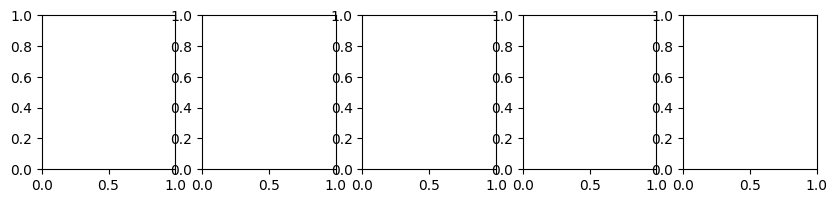

In [ ]:
NUM_EXAMPLES = 5

for label in labels:
  label_dir = os.path.join(dataset_path, label)
  example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]
  fig, axs = plt.subplots(1, NUM_EXAMPLES, figsize=(10,2))
  for i in range(NUM_EXAMPLES):
    axs[i].imshow(plt.imread(os.path.join(label_dir, example_filenames[i])))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
  fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}')

plt.show()

In [ ]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=dataset_path,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

In [ ]:
hparams = gesture_recognizer.HParams(export_dir="exported_model")
options = gesture_recognizer.GestureRecognizerOptions(hparams=hparams)
model = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 6)                 774       
 out (Dense)                                                     
                                                             

In [ ]:
loss, acc = model.evaluate(test_data, batch_size=1)
print(f"Test loss:{loss}, Test accuracy:{acc}")

54/54 [==============================] - 2s 4ms/step - loss: 0.2524 - categorical_accuracy: 0.9074
Test loss:0.25240442156791687, Test accuracy:0.9074074029922485


In [ ]:
model.export_model()
!ls exported_model

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs


In [ ]:
files.download('exported_model/gesture_recognizer.task')

AttributeError: 'list' object has no attribute 'download'

In [ ]:
hparams = gesture_recognizer.HParams(learning_rate=0.003, export_dir="exported_model_2", epochs=10)
model_options = gesture_recognizer.ModelOptions(dropout_rate=0.2)
options = gesture_recognizer.GestureRecognizerOptions(model_options=model_options, hparams=hparams)
model_2 = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 6)                 774       
 out (Dense)                                                     
                                                           

In [ ]:
loss, accuracy = model_2.evaluate(test_data)
print(f"Test loss:{loss}, Test accuracy:{accuracy}")

2/2 [==============================] - 3s 131ms/step - loss: 0.3453 - categorical_accuracy: 0.9074
Test loss:0.3453475832939148, Test accuracy:0.9074074029922485


In [ ]:
model_2.export_model()
!ls exported_model

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs


## Static gesture for the project
- Opened hand (palm): eow
- index up: writing mod (word level)
- fist: delete word
- inverted open hand: eol
- 2: change keyboard (numbers, punctuation) and vice-versa


In [ ]:
!rm -r  /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset
!mkdir /root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset

rm: cannot remove '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset': No such file or directory


In [ ]:
source_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/hagrid-sample-30k-384p/hagrid_30k"
target_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset"

os.makedirs(target_dir, exist_ok=True)

In [ ]:
import random

In [ ]:
source_folder_stop = os.path.join(source_dir, "train_val_stop")
source_folder_palm = os.path.join(source_dir, "train_val_palm")

target_folder = os.path.join(target_dir, "open_hand")
os.makedirs(target_folder, exist_ok=True)

files_folder_stop = os.listdir(source_folder_stop)[:250]
files_folder_palm = os.listdir(source_folder_palm)[:250]

files_to_copy = files_folder_stop + files_folder_palm
random.shuffle(files_to_copy)

for file_name in files_to_copy:
    if file_name in files_folder_stop:
        source_file = os.path.join(source_folder_stop, file_name)
    elif file_name in files_folder_palm:
        source_file = os.path.join(source_folder_palm, file_name)
    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [ ]:
source_folder_fist = os.path.join(source_dir, "train_val_fist")

target_folder = os.path.join(target_dir, "fist")
os.makedirs(target_folder, exist_ok=True)

files_folder_fist = os.listdir(source_folder_fist)[:500]

for file_name in files_folder_fist:
    source_file = os.path.join(source_folder_fist, file_name)

    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [ ]:
source_folder_one = os.path.join(source_dir, "train_val_one")

target_folder = os.path.join(target_dir, "index_up")
os.makedirs(target_folder, exist_ok=True)

files_folder_one = os.listdir(source_folder_one)[:500]

for file_name in files_folder_one:
    source_file = os.path.join(source_folder_one, file_name)

    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [ ]:
source_folder_stop_inv = os.path.join(source_dir, "train_val_stop_inverted")

target_folder = os.path.join(target_dir, "open_hand_inv")
os.makedirs(target_folder, exist_ok=True)

files_folder_stop_inv = os.listdir(source_folder_stop_inv)[:500]

for file_name in files_folder_stop_inv:
    source_file = os.path.join(source_folder_stop_inv, file_name)

    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [ ]:
source_folder_peace = os.path.join(source_dir, "train_val_peace")
source_folder_two_up = os.path.join(source_dir, "train_val_two_up")

target_folder = os.path.join(target_dir, "two")
os.makedirs(target_folder, exist_ok=True)

files_folder_peace = os.listdir(source_folder_peace)[:250]
files_folder_two_up = os.listdir(source_folder_two_up)[:250]

files_to_copy = files_folder_peace + files_folder_two_up
random.shuffle(files_to_copy)

for file_name in files_to_copy:
    if file_name in files_folder_peace:
        source_file = os.path.join(source_folder_peace, file_name)
    elif file_name in files_folder_two_up:
        source_file = os.path.join(source_folder_two_up, file_name)
    target_file = os.path.join(target_folder, file_name)
    shutil.copy2(source_file, target_file)

In [ ]:
none_folder = os.path.join(target_dir, "None")
os.makedirs(none_folder, exist_ok=True)

excluded_folders = ["train_val_fist", "train_val_stop", "train_val_palm", "train_val_one", "train_val_two_up", "train_val_stop_inverted", "train_val_peace"]
folders = [folder for folder in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, folder)) and folder not in excluded_folders]

for folder_name in folders:
    source_folder = os.path.join(source_dir, folder_name)

    files = os.listdir(source_folder)
    files_to_copy = files[:41]

    for file_name in files_to_copy:
        source_file = os.path.join(source_folder, file_name)
        target_file = os.path.join(none_folder, file_name)
        shutil.copy2(source_file, target_file)

    print(f"Copiati {len(files_to_copy)} file dalla cartella '{folder_name}' a '{none_folder}'")

print("Operazione completata.")

Copiati 41 file dalla cartella 'train_val_mute' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 41 file dalla cartella 'train_val_dislike' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 41 file dalla cartella 'train_val_like' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 41 file dalla cartella 'train_val_peace_inverted' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 41 file dalla cartella 'train_val_three' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 41 file dalla cartella 'train_val_call' a '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiati 41 file dalla cartella 'train_

In [ ]:
!wget https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
!unzip rps_data_sample.zip
rps_dataset = "rps_data_sample"

--2025-01-13 12:16:58--  https://storage.googleapis.com/mediapipe-tasks/gesture_recognizer/rps_data_sample.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12332447 (12M) [application/zip]
Saving to: ‘rps_data_sample.zip’

rps_data_sample.zip 100%[===================>]  11.76M  7.22MB/s    in 1.6s    

2025-01-13 12:17:00 (7.22 MB/s) - ‘rps_data_sample.zip’ saved [12332447/12332447]

Archive:  rps_data_sample.zip
   creating: rps_data_sample/
   creating: rps_data_sample/paper/
   creating: rps_data_sample/rock/
   creating: rps_data_sample/scissors/
   creating: rps_data_sample/none/
  inflating: rps_data_sample/paper/77.jpg  
  inflating: rps_data_sample/paper/837.jpg  
  inflating: rps_data_sample/paper/176.jpg  
  inflating: rps_data_sample/paper/406.jpg  
  inflating:

In [ ]:
existing_files = []

none_folder = os.path.join(target_dir, "None")

source_folder_none = os.path.join(rps_dataset, "none")

all_images = [file for file in os.listdir(source_folder_none) if os.path.isfile(os.path.join(source_folder_none, file))]

random_images = random.sample(all_images, 49)

for img_name in random_images:
    source_file = os.path.join(source_folder_none, img_name)
    target_file = os.path.join(none_folder, img_name)
    shutil.copy2(source_file, target_file)

    print(f"Copiato il file '{img_name}' in '{none_folder}'")

print("49 immagini casuali aggiunte alla cartella 'None'.")

Copiato il file '1633.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '1128.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '71.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '1206.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '1890.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '60.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '1650.jpg' in '/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset/None'
Copiato il file '1224.jpg' in '/root/.

In [ ]:
file_count = len([file for file in os.listdir(none_folder) if os.path.isfile(os.path.join(none_folder, file))])
file_count

500

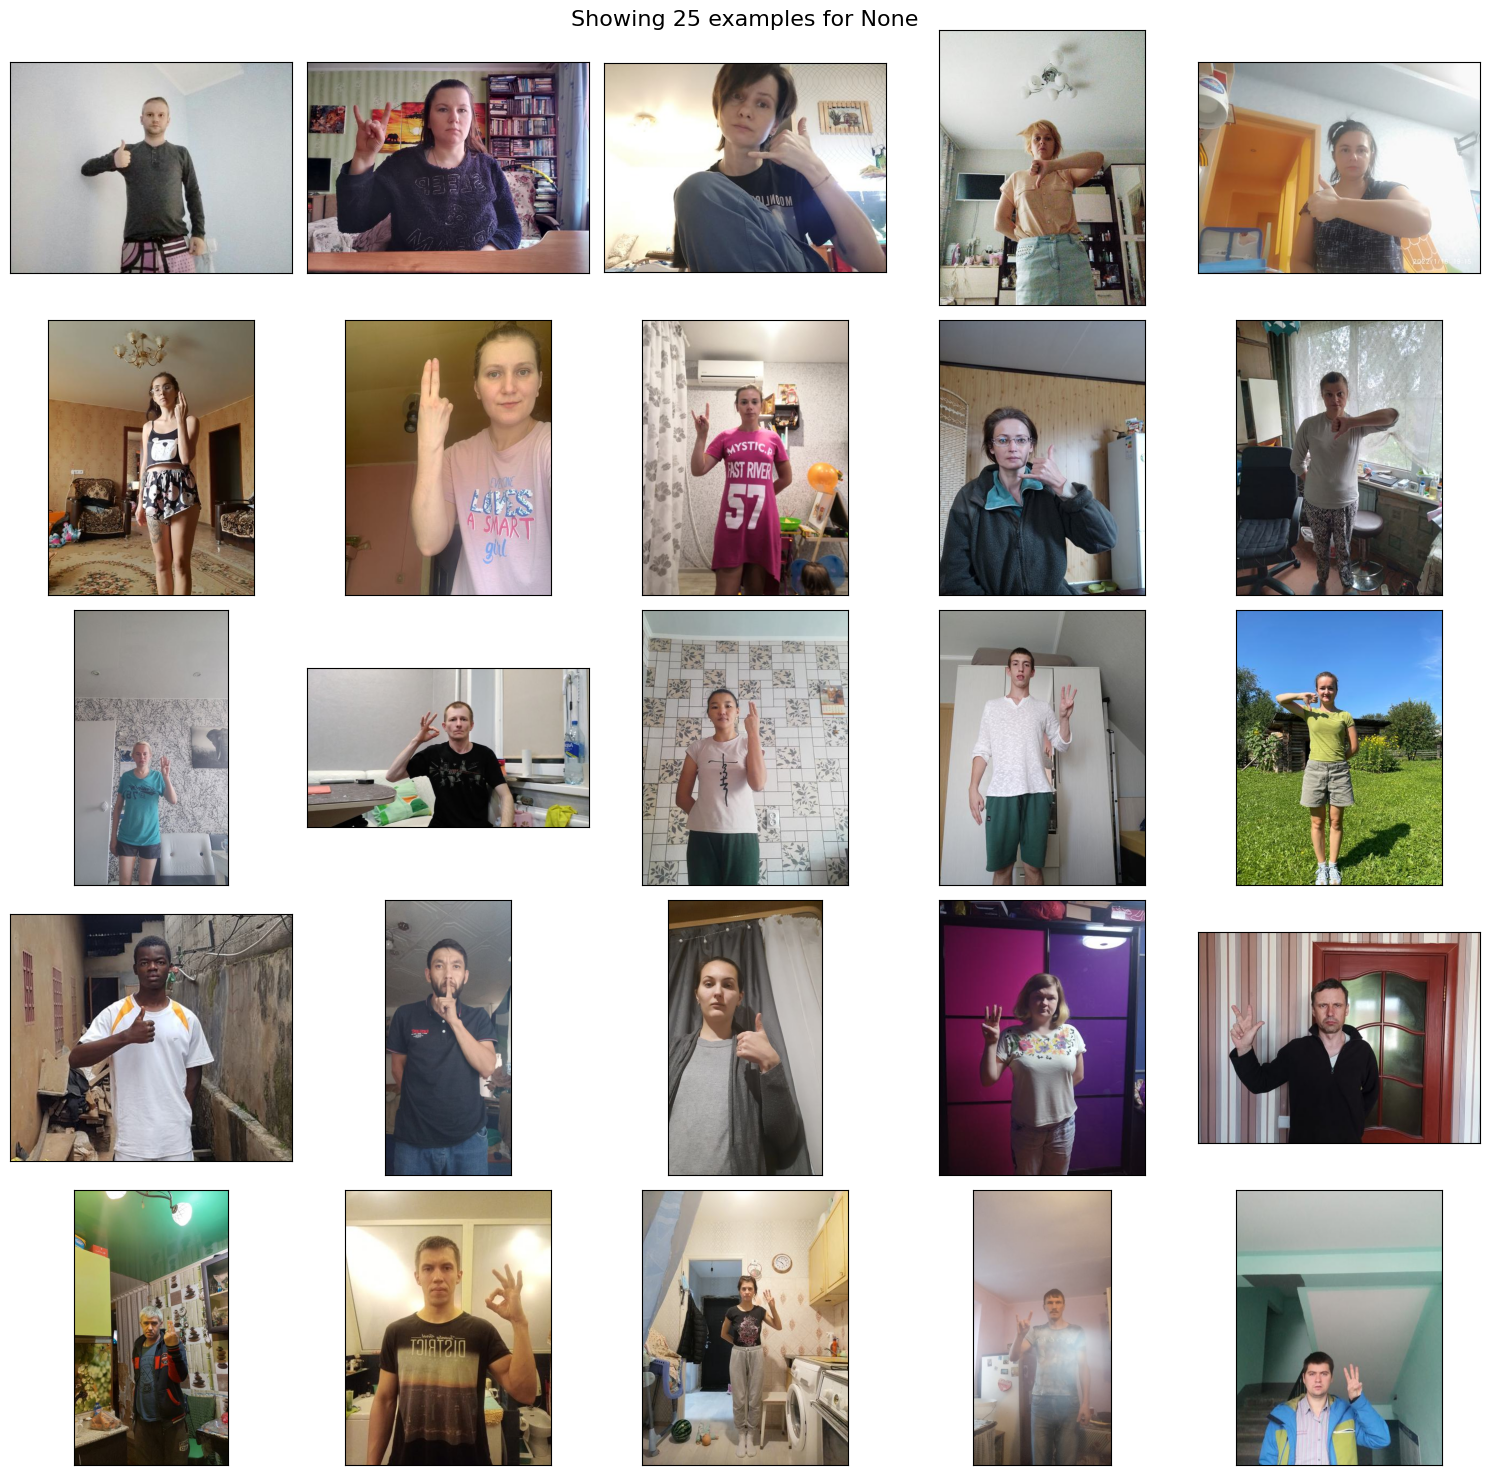

In [ ]:
NUM_EXAMPLES = 25
IMAGES_PER_ROW = 5
label = "None"
label_dir = os.path.join(target_dir, label)

example_filenames = os.listdir(label_dir)[:NUM_EXAMPLES]

num_rows = (NUM_EXAMPLES + IMAGES_PER_ROW - 1) // IMAGES_PER_ROW

fig, axs = plt.subplots(num_rows, IMAGES_PER_ROW, figsize=(15, num_rows * 3))

for i in range(NUM_EXAMPLES):
    img_path = os.path.join(label_dir, example_filenames[i])
    row, col = divmod(i, IMAGES_PER_ROW)
    axs[row, col].imshow(plt.imread(img_path))
    axs[row, col].get_xaxis().set_visible(False)
    axs[row, col].get_yaxis().set_visible(False)

for i in range(NUM_EXAMPLES, num_rows * IMAGES_PER_ROW):
    row, col = divmod(i, IMAGES_PER_ROW)
    axs[row, col].axis('off')

fig.suptitle(f'Showing {NUM_EXAMPLES} examples for {label}', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=target_dir,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data_1 = rest_data.split(0.5)

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder


In [ ]:
hparams = gesture_recognizer.HParams(learning_rate=0.003, export_dir="exported_model_2", epochs=10)
model_options = gesture_recognizer.ModelOptions(dropout_rate=0.2)
options = gesture_recognizer.GestureRecognizerOptions(model_options=model_options, hparams=hparams)
model_2 = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 6)                 774       
 out (Dense)                                                     
                                                           

In [ ]:
loss, accuracy = model_2.evaluate(test_data)
print(f"Test loss:{loss}, Test accuracy:{accuracy}")

9/9 [==============================] - 8s 68ms/step - loss: 0.2084 - categorical_accuracy: 0.8764
Test loss:0.20843610167503357, Test accuracy:0.876447856426239


In [ ]:
!ls

exported_model_2  rps_data_sample  rps_data_sample.zip	rps_data_sample.zip.1  sample_data


In [ ]:
model_2.export_model()
!ls exported_model_2

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs


##Data augmentation
Trasformation:
- rotation
- scaling
- brightness and contrast
- color conversion
- blur
- noise
- sharpening

In [ ]:
import cv2
import numpy as np

In [ ]:
dataset_dir = "/root/.cache/kagglehub/datasets/innominate817/hagrid-sample-30k-384p/versions/5/StaticGestureDataset"
output_dir = "/root/.cache/kagglehub/datasets/augmented_dataset"

In [ ]:
os.makedirs(output_dir, exist_ok=True)


In [ ]:
def random_rotation(image):
    angle = random.randint(-180, 180)
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (w, h))

def random_scaling(image):
    scale = random.uniform(0.8, 1.2)
    h, w = image.shape[:2]
    return cv2.resize(image, (int(w * scale), int(h * scale)))

def random_brightness_contrast(image):
    alpha = random.uniform(0.8, 1.2)
    beta = random.randint(-30, 30)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def random_color_conversion(image):
    conversions = [cv2.COLOR_BGR2HSV, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YUV]
    conversion = random.choice(conversions)
    return cv2.cvtColor(image, conversion)

def random_blur(image):
    kernel_size = random.choice([3, 5])
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def random_noise(image):
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
    return cv2.add(image, noise)

def random_sharpening(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

In [ ]:
def apply_random_transformations(image):
    transformations = [
        random_rotation,
        random_scaling,
        random_brightness_contrast,
        random_color_conversion,
        random_blur,
        random_noise,
        random_sharpening,
    ]
    num_transformations = random.randint(1, len(transformations))
    selected = random.sample(transformations, num_transformations)
    for transform in selected:
        image = transform(image)
    return image

In [ ]:
for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        output_folder = os.path.join(output_dir, folder)
        os.makedirs(output_folder, exist_ok=True)

        images = [f for f in os.listdir(folder_path) if f.endswith((".png", ".jpg", ".jpeg"))]
        for image_name in images:
            image_path = os.path.join(folder_path, image_name)
            image = cv2.imread(image_path)

            # Salva l'immagine originale nella cartella di output
            cv2.imwrite(os.path.join(output_folder, image_name), image)

            # Genera una nuova immagine trasformata
            for i in range(1):  # Crea una nuova immagine per ogni immagine originale
                transformed_image = apply_random_transformations(image)
                new_image_name = f"{os.path.splitext(image_name)[0]}_aug_{i}.jpg"
                new_image_path = os.path.join(output_folder, new_image_name)
                cv2.imwrite(new_image_path, transformed_image)

print("Data augmentation completata.")

Data augmentation completata.


In [ ]:

file_count = len([file for file in os.listdir("/root/.cache/kagglehub/datasets/augmented_dataset/None" ) if os.path.isfile(os.path.join("/root/.cache/kagglehub/datasets/augmented_dataset/None" , file))])
file_count

1000

In [ ]:
data = gesture_recognizer.Dataset.from_folder(
    dirname=output_dir,
    hparams=gesture_recognizer.HandDataPreprocessingParams()
)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder


In [ ]:
hparams = gesture_recognizer.HParams(learning_rate=0.003, export_dir="exported_model_2", epochs=10, gamma=3)
model_options = gesture_recognizer.ModelOptions(dropout_rate=0.2)
options = gesture_recognizer.GestureRecognizerOptions(model_options=model_options, hparams=hparams)
model_2 = gesture_recognizer.GestureRecognizer.create(
    train_data=train_data,
    validation_data=validation_data,
    options=options
)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hand_embedding (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 custom_gesture_recognizer_  (None, 6)                 774       
 out (Dense)                                                     
                                                           

In [ ]:
loss, accuracy = model_2.evaluate(test_data_1)
print(f"Test loss:{loss}, Test accuracy:{accuracy}")

9/9 [==============================] - 8s 64ms/step - loss: 0.3024 - categorical_accuracy: 0.8571
Test loss:0.3023953437805176, Test accuracy:0.8571428656578064


In [ ]:
model_2.export_model()
!ls exported_model_2

Using existing files at /tmp/model_maker/gesture_recognizer/gesture_embedder.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/palm_detection_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/hand_landmark_full.tflite
Using existing files at /tmp/model_maker/gesture_recognizer/canned_gesture_classifier.tflite
best_model_weights.data-00000-of-00001	checkpoint    gesture_recognizer.task  metadata.json
best_model_weights.index		epoch_models  logs
